In [1]:
import requests

In [2]:
city = 'kanpur'
url = 'http://api.waqi.info/feed/' + city + '/?token='
api_key = '37f96394ffe8b6cca1110af3d8270604c711c688'

main_url = url + api_key
r = requests.get(main_url)
data = r.json()['data']
data

{'aqi': 169,
 'idx': 8187,
 'attributions': [{'url': 'http://cpcb.nic.in/',
   'name': 'CPCB - India Central Pollution Control Board',
   'logo': 'India-CPCB.png'},
  {'url': 'https://waqi.info/', 'name': 'World Air Quality Index Project'}],
 'city': {'geo': [26.4703088, 80.3251749],
  'name': 'Nehru Nagar, Kanpur, India',
  'url': 'https://aqicn.org/city/india/kanpur/nehru-nagar'},
 'dominentpol': 'so2',
 'iaqi': {'dew': {'v': 17},
  'h': {'v': 38},
  'no2': {'v': 5.6},
  'o3': {'v': 23.7},
  'p': {'v': 751},
  'pm25': {'v': 107},
  'so2': {'v': 169.4},
  't': {'v': 33.6},
  'w': {'v': 2.6}},
 'time': {'s': '2021-03-23 12:00:00',
  'tz': '+05:30',
  'v': 1616500800,
  'iso': '2021-03-23T12:00:00+05:30'},
 'forecast': {'daily': {'o3': [{'avg': 26,
     'day': '2021-03-21',
     'max': 61,
     'min': 14},
    {'avg': 36, 'day': '2021-03-22', 'max': 60, 'min': 22},
    {'avg': 38, 'day': '2021-03-23', 'max': 62, 'min': 21},
    {'avg': 29, 'day': '2021-03-24', 'max': 49, 'min': 20},
   

In [3]:
aqi = data['aqi']
iaqi = data['iaqi']

del iaqi['p']

for i in iaqi.items():
    print(i[0],':',i[1]['v'])


dew : 17
h : 38
no2 : 5.6
o3 : 23.7
pm25 : 107
so2 : 169.4
t : 33.6
w : 2.6


In [4]:
dew = iaqi.get('dew','Nil')
no2 = iaqi.get('no2','Nil')
o3 = iaqi.get('o3','Nil')
so2 = iaqi.get('so2','Nil')
pm10 = iaqi.get('pm10','Nil')
pm25 = iaqi.get('pm25','Nil')

print(f'{city} AQI :',aqi,'\n')
print('Individual Air quality')
print('Dew :',dew)
print('no2 :',no2)
print('Ozone :',o3)
print('sulphur :',so2)
print('pm10 :',so2)
print('pm25 :',pm25)


kanpur AQI : 169 

Individual Air quality
Dew : {'v': 17}
no2 : {'v': 5.6}
Ozone : {'v': 23.7}
sulphur : {'v': 169.4}
pm10 : {'v': 169.4}
pm25 : {'v': 107}


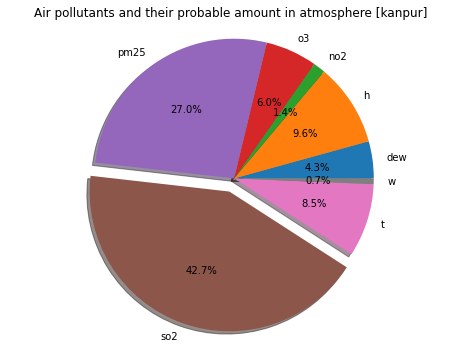

In [5]:
import matplotlib.pyplot as plt

pollutants = [i for i in iaqi]
values = [i['v'] for i in iaqi.values()]


# Exploding the first slice
explode = [0 for i in pollutants]
mx = values.index(max(values))  # explode 1st slice
explode[mx] = 0.1

# Plot a pie chart
plt.figure(figsize=(8,6))
plt.pie(values, labels=pollutants,explode=explode,autopct='%1.1f%%', shadow=True)

plt.title('Air pollutants and their probable amount in atmosphere [kanpur]')

plt.axis('equal')
plt.show()
